In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
!pip install keras 

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
data = pd.read_csv('IMDB Dataset.csv')

## EDA

In [4]:
data.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
review_length = [len(review.split()) for review in data['review']]
data['review_length'] = review_length

In [7]:
dummy = pd.get_dummies(data.sentiment, drop_first=True)
data = pd.concat([data, dummy], axis=1)


In [8]:
data.head()

,review,sentiment,review_length,positive
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


<AxesSubplot:xlabel='positive', ylabel='count'>

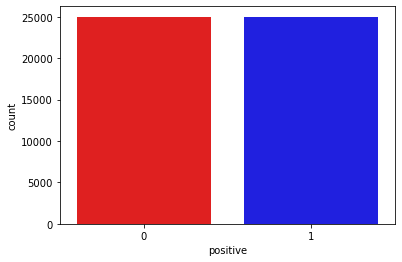

In [9]:
sns.countplot(x='positive', data=data, palette = ["red","blue"])

In [10]:
data.review_length[data["sentiment"] == "positive"].describe()

count    25000.000000
mean       232.849320
std        177.497046
min         10.000000
25%        125.000000
50%        172.000000
75%        284.000000
max       2470.000000
Name: review_length, dtype: float64

In [11]:
data.review_length[data["sentiment"] == "negative"].describe()

count    25000.000000
mean       229.464560
std        164.947795
min          4.000000
25%        128.000000
50%        174.000000
75%        278.000000
max       1522.000000
Name: review_length, dtype: float64

<AxesSubplot:ylabel='Count'>

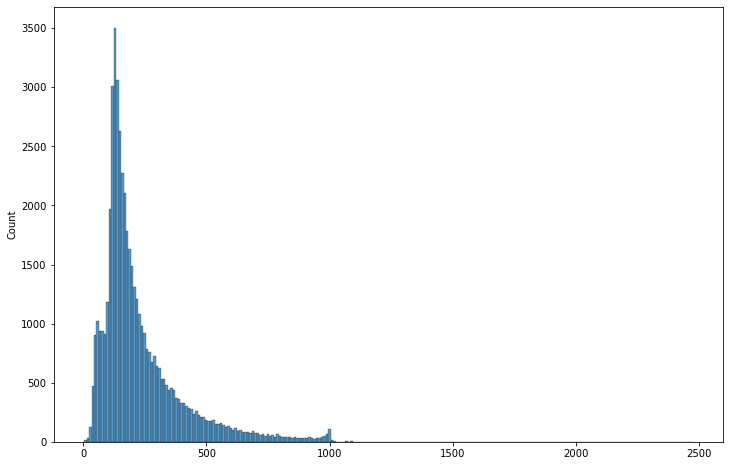

In [12]:
plt.figure(figsize = (12,8))
sns.histplot(review_length, binwidth = 10)

#### Remove HTML from reviews

In [13]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [14]:
data["clean_review"] = data.review.apply(remove_tags)

In [15]:
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,"Petter Mattei's ""Love in the Time of Money"" is..."


In [16]:
def spliter(word):
    words = []
    for i in word:
        for j in i.split():
            words.append(j.strip())
    return words
word_count = spliter(data.clean_review)

In [17]:
from collections import Counter
counter = Counter(word_count)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['word','count'])
most_common = most_common.sort_values('count', ascending=False)
most_common

,word,count
0,the,568757
1,a,306959
2,and,301924
3,of,283625
4,to,261849
5,is,203056
6,in,169982
7,I,133367
8,that,126818
9,this,113733


#### Remove stopwords from review

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("popular")

In [19]:
def remove_stopwords(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens=word_tokenize(text)
    tokens_without_sw = [word for word in tokens if not word in stop_words]
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text
#try vectorization through numpy. Use apply function with pandas. 

In [20]:
data['clean_review'] = data.clean_review.apply(remove_stopwords)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically 's family little boy ( Jake ) thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei 's `` Love Time Money '' visuall...


#### Removing punctuation

In [21]:
import string
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
data['clean_review']=data['clean_review'].apply(remove_punctuations)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically s family little boy Jake thinks s ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei s Love Time Money visually stu...


In [22]:
word_count2 = spliter(data.clean_review)
counter = Counter(word_count2)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['word','count'])
most_common = most_common.sort_values('count', ascending=False)
most_common

,word,count
0,I,157133
1,s,121762
2,movie,83924
3,The,77762
4,film,76041
5,nt,65935
6,one,47124
7,like,37699
8,It,33255
9,good,27620


In [ ]:
!pip install numpy
!pip install pillow
!pip install --upgrade Pillow
!pip install wordcloud
%conda install -c conda-forge wordcloud

C:\Users\snowduri\Desktop\Springboard Datascience Course - ML\Springboard_Capstone3_IMDB_Sentiment_Analysis\IMDB-Sentiment-Analysis\aptos-narrow.ttf


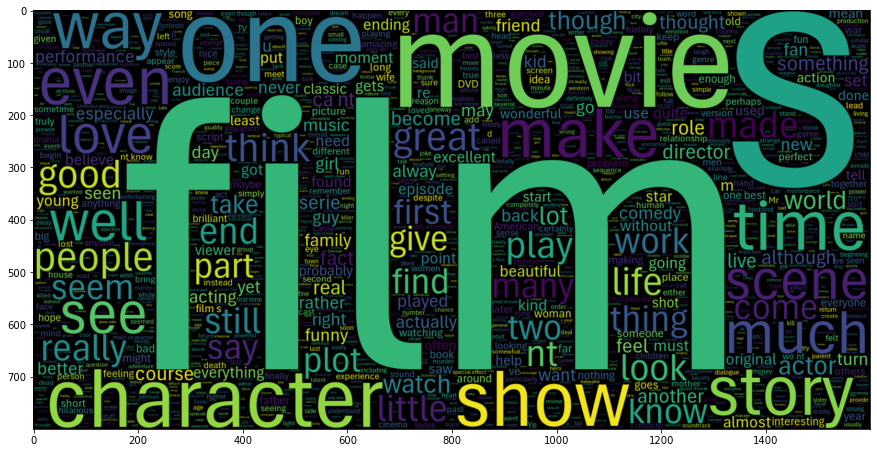

In [26]:
from wordcloud import WordCloud, STOPWORDS

# Positive Review Text
#font_path = r"C:\Users\snowduri\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\*.ttf"
local_font_path = r"C:\Users\snowduri\Desktop\Springboard Datascience Course - ML\Springboard_Capstone3_IMDB_Sentiment_Analysis\IMDB-Sentiment-Analysis\aptos-narrow.ttf"
#r"C:\Users\snowduri\Anaconda3\pkgs\matplotlib-base-3.3.4-py38h49ac443_0\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\*.ttf"
plt.figure(figsize=(15, 12))
stopwords = set(STOPWORDS)  # Add stopwords (optional)
wc_pos = WordCloud(max_words=1500, width=1600, height=800, stopwords=stopwords, prefer_horizontal=True, font_path=local_font_path).generate(
    " ".join(data[data.sentiment == 'positive'].clean_review)
)
print(wc_pos.font_path)
plt.tight_layout(pad=0)  # shrink the size of the border
plt.imshow(wc_pos, interpolation='bilinear')

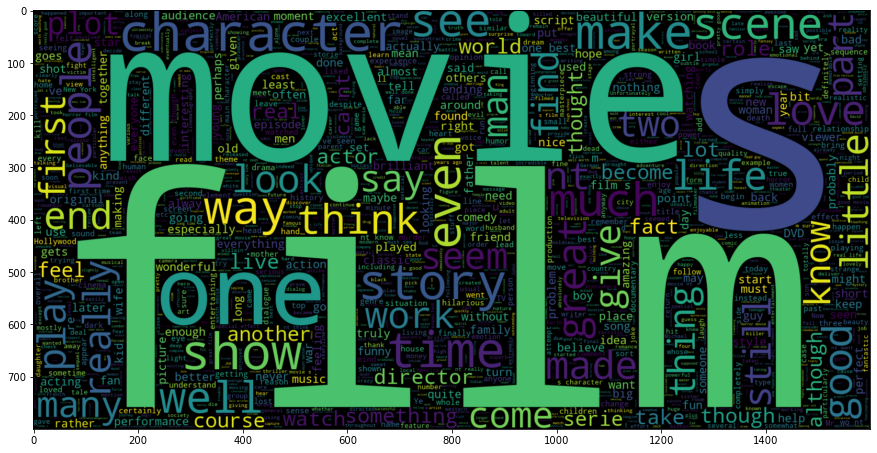

In [25]:
from wordcloud import WordCloud
# Positive Review Text
plt.figure(figsize = (15,12))
wc_pos = WordCloud(max_words = 1500, width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'positive'].clean_review))
plt.tight_layout(pad=0) #shrink the size of the border
plt.imshow(wc_pos, interpolation = 'bilinear')
#displayed image appear more smoothly

#font_path = 'path_to_your_font.ttf'
#font_path = 'arial.ttf'
# font_path = None

# wc_pos = WordCloud(max_words=1500, width=1600, height=800, font_path=font_path).generate(" ".join(data[data.sentiment == 'positive'].clean_review))

# plt.tight_layout(pad=0)  # shrink the size of the border
# plt.imshow(wc_pos, interpolation='bilinear')
# plt.axis('off')  # Hide axis
# plt.show()




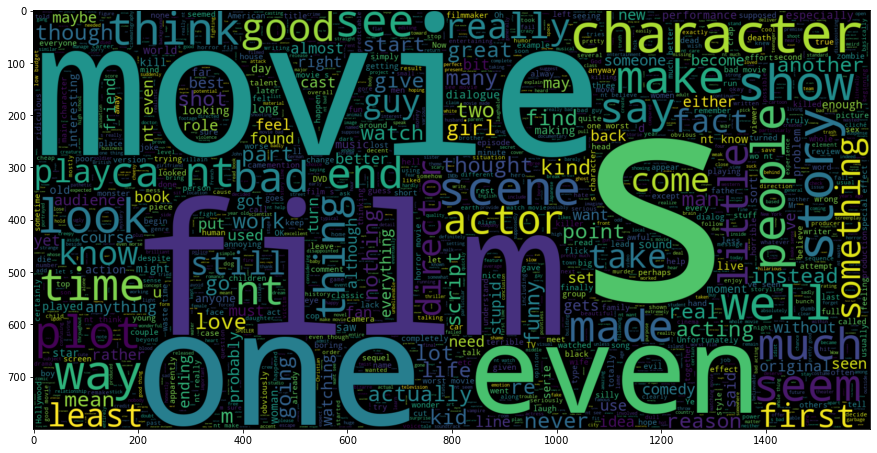

In [27]:
plt.figure(figsize = (15,12)) # Negative Review Text
wc_neg = WordCloud(max_words = 2000, width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'negative'].clean_review))
plt.imshow(wc_neg, interpolation = 'bilinear')

### Preprocessing and Modeling

In [ ]:
!pip install tensorflow-text

In [ ]:
!pip install tf-models-official

First we will try something simple like Decision Tree 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data2 = data[0:2000]

In [31]:
from sklearn.model_selection import train_test_split
X = vectorizer.fit_transform(data2['clean_review']).toarray()
y = data2.positive.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=6) #Use entropy for information gain
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

score = dt.score(X_test, y_test)
print(score)

0.6475


BERT Model

#### Self-supervised learning in BERT is accomplished by masking and corrupting few words in each sentence and have the model learn by predicting those words.

#### Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT. TensorFlow Hub provides a matching preprocessing model for each of the BERT models discussed above, which implements this transformation using TF ops from the TF.text library. It is not necessary to run pure Python code outside your TensorFlow model to preprocess text.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization 
tf.get_logger().setLevel('ERROR')

This is the preferred API to load a TF2-style SavedModel from TF Hub into a Keras model.

In [34]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [35]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [36]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [37]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  layer = outputs['pooled_output']
  layer = tf.keras.layers.Dropout(0.1)(layer)
  layer = tf.keras.layers.Dense(1, activation=None, name='classifier')(layer)
  return tf.keras.Model(text_input, layer)

In [38]:
classifier_model = build_classifier_model()
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [39]:
epochs = 3
steps_per_epoch = 625 
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [40]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [41]:
data1 = data[0:30000]
data1.shape

(30000, 5)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data1.clean_review, data1.positive, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [43]:
history = classifier_model.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Epoch 1/3
525/525 [==============================] - 2253s 4s/step - loss: 0.4529 - binary_accuracy: 0.7624 - val_loss: 0.3550 - val_binary_accuracy: 0.8311
Epoch 2/3
525/525 [==============================] - 2212s 4s/step - loss: 0.2958 - binary_accuracy: 0.8723 - val_loss: 0.3221 - val_binary_accuracy: 0.8683
Epoch 3/3
525/525 [==============================] - 2201s 4s/step - loss: 0.2280 - binary_accuracy: 0.9095 - val_loss: 0.3640 - val_binary_accuracy: 0.8519


In [44]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

188/188 [==============================] - 1541s 8s/step - loss: 0.3505 - binary_accuracy: 0.8588
Loss: 0.350525826215744
Accuracy: 0.8588333129882812


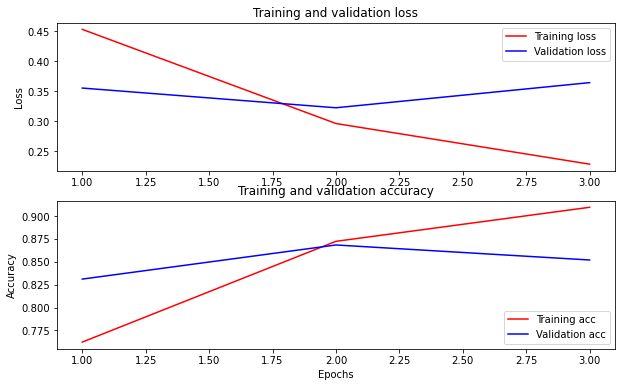

In [45]:
history_dict = history.history
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')